In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
np.random.seed(0)

m = 1_000
split_train = int(m * 0.7)
split_val = int(m * 0.15 + split_train)
split_test = int(m * 0.15 + split_val)

X, y = datasets.make_moons(
    n_samples=m, 
    noise=0.1, 
    random_state=0
)

X_train, y_train = X[:split_train], y[:split_train]
X_val, y_val = X[split_train:split_val], y[split_train:split_val]
X_test, y_test = X[split_val:split_test], y[split_val:split_test]

In [3]:
print('Splits:', split_train, split_val, split_test)
print('Lenghths:', len(X_train), len(X_val), len(X_test))

Splits: 700 850 1000
Lenghths: 700 150 150


((1000,), (1000, 2))

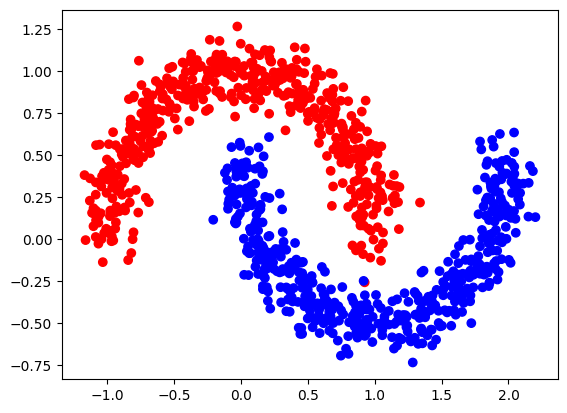

In [4]:
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [5]:
X_train[0], y_train[0]

(array([2.04271531, 0.51812416]), 1)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [10]:
epochs = 1_000

In [11]:
with utils.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 16.46 seconds.


In [12]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.6678 - binary_accuracy: 0.8371


[0.667824387550354, 0.8371428847312927]

In [13]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.8200


[0.6688395738601685, 0.8199999928474426]

32/32 [==============================] - 0s 684us/step


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

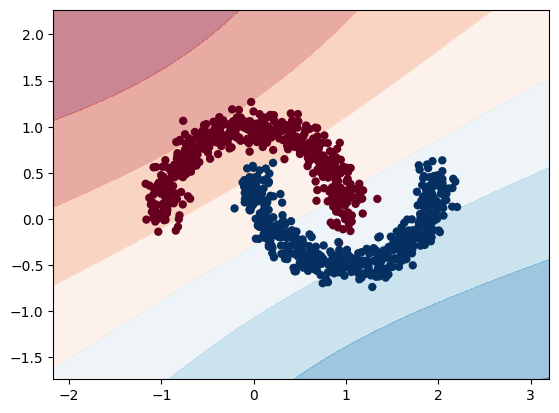

In [14]:
utils.plot_decision_boundary(X, y, model, cmap='RdBu')

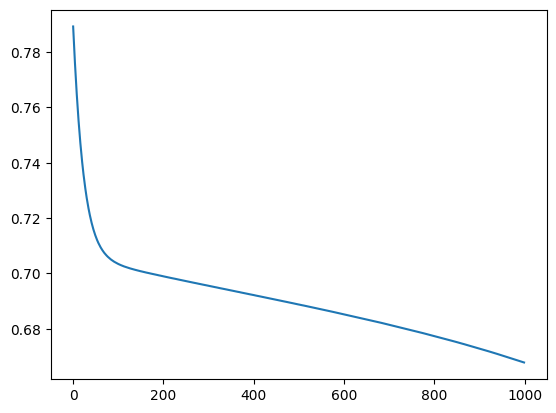

In [15]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [16]:
epochs = 3_000

In [17]:
with utils.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 45.31 seconds.


In [18]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.3199 - binary_accuracy: 0.8543


[0.3199218809604645, 0.854285717010498]

In [19]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 1ms/step - loss: 0.3329 - binary_accuracy: 0.8467


[0.33288419246673584, 0.846666693687439]

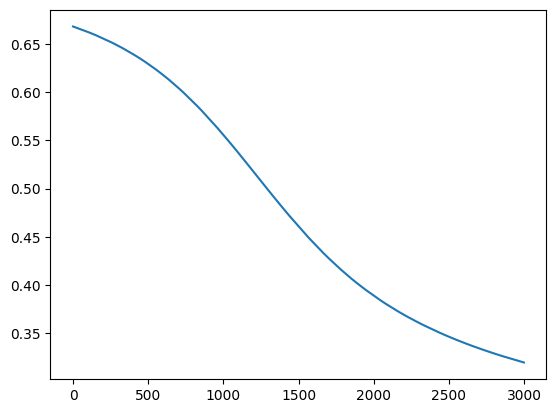

In [20]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 876us/step


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

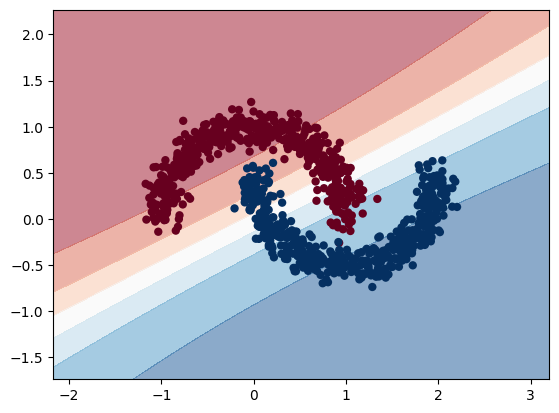

In [21]:
utils.plot_decision_boundary(X, y, model, cmap='RdBu')

In [22]:
del model
del history

In [23]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [24]:
epochs = 1_000

In [25]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [26]:
with utils.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 15.35 seconds.


In [27]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.2450 - binary_accuracy: 0.8900


[0.24504470825195312, 0.8899999856948853]

In [28]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 5ms/step - loss: 0.2604 - binary_accuracy: 0.8800


[0.2604363262653351, 0.8799999952316284]

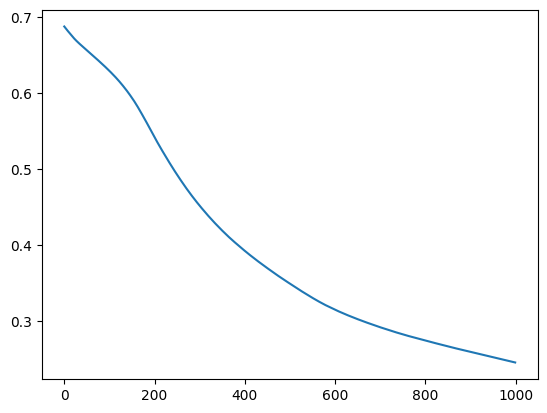

In [29]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [30]:
del model
del history

In [31]:
model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
epochs = 1_000

In [33]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001), 
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy()]
)

In [34]:
with utils.Timer():
    history = model.fit(
        X_train, 
        y_train, 
        verbose=0, 
        epochs=epochs, 
        shuffle=True
    )

** 16.05 seconds.


In [35]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 925us/step - loss: 0.0025 - binary_accuracy: 0.9986


[0.002527496311813593, 0.9985714554786682]

In [36]:
model.evaluate(X_val, y_val)

5/5 [==============================] - 0s 4ms/step - loss: 8.6953e-04 - binary_accuracy: 1.0000


[0.0008695299620740116, 1.0]

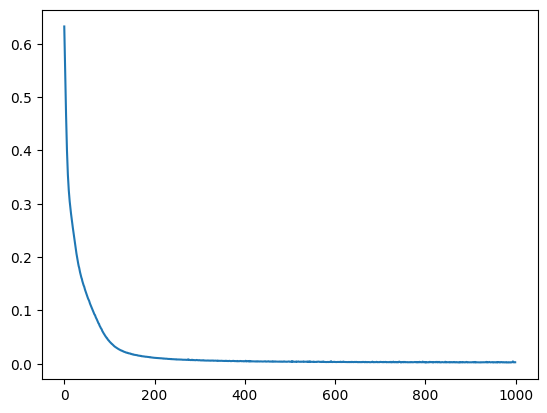

In [37]:
plt.plot([i for i in range(epochs)], history.history['loss'])

32/32 [==============================] - 0s 578us/step


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

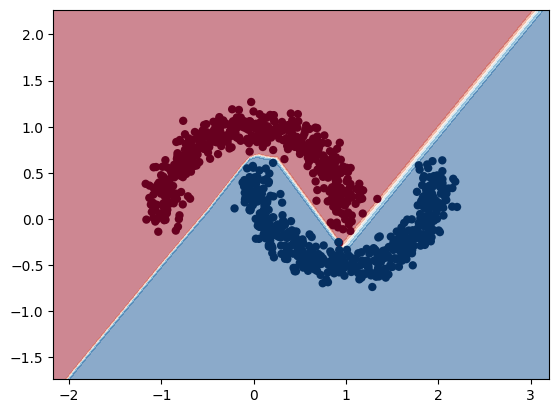

In [38]:
utils.plot_decision_boundary(X, y, model, cmap='RdBu')

In [39]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 3.2549e-04 - binary_accuracy: 1.0000


[0.0003254925541114062, 1.0]

5/5 [==============================] - 0s 2ms/step


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

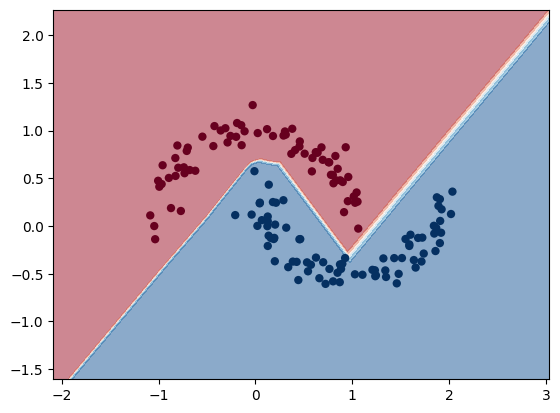

In [40]:
utils.plot_decision_boundary(X_test, y_test, model, cmap='RdBu')